## Figure 2

In [6]:
import numpy as np

from power_law_fisher_info.utils import get_fdt_df

np.random.seed(0)

N = 100
M = N // 2
K = 10000
sgm0 = 0.01
sgm1 = 0.01

alpha_min = 1.5
alpha_max = 4.5
alpha_list = (alpha_max - alpha_min) * np.random.rand(50) + alpha_min
alpha_list = np.sort(alpha_list)

L = 10
theta_list = 2 * np.pi * np.random.rand(L)
eps = 1e-3

df = get_fdt_df(alpha_list, theta_list, sgm0, sgm1, eps, K, N, M)

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


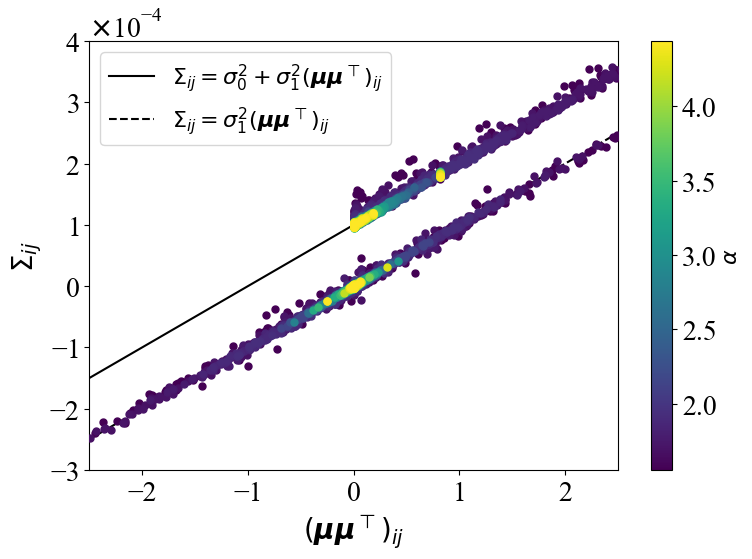

In [7]:
import os

import matplotlib.pyplot as plt
from matplotlib.ticker import ScalarFormatter

plt.rcParams.update(
    {
        #    "text.usetex": True,
        "font.family": "Times New Roman",
        #    "font.family": "sans-serif",
        "font.sans-serif": "Helvetica",
        "font.size": 20,
    }
)
plt.rc("text.latex", preamble=r"\usepackage{bm}")
plt.rc("text.latex", preamble=r"\usepackage{amsmath}")

cmap = plt.get_cmap("viridis")

alpha_min = df["alpha"].min()
alpha_max = df["alpha"].max()
colors = cmap((df["alpha"] - alpha_min) / (alpha_max - alpha_min))

xmin = -2.5
xmax = 2.5
x_list = np.linspace(xmin, xmax, 100)

ymin = -0.0003
ymax = 0.0004

fig, ax = plt.subplots(figsize=(8, 6), tight_layout=True, facecolor="white")

s = 25
zorder_offset = 11
for i, (x1, y1, x2, y2, color) in enumerate(
    zip(df["xs1"], df["ys1"], df["xs2"], df["ys2"], colors)
):
    ax.scatter(
        [x1, x2], [y1, y2], color=color, s=s, marker="o", zorder=zorder_offset + i
    )


ax.plot(
    x_list,
    sgm0**2 + x_list * sgm1**2,
    "-",
    label=r"$\Sigma_{ij}=\sigma_0^2 + \sigma_1^2 (\boldsymbol{\mu} \boldsymbol{\mu}^\top)_{ij}$",
    color="k",
    zorder=10,
)
ax.plot(
    x_list,
    x_list * sgm1**2,
    "--",
    label=r"$\Sigma_{ij}=\sigma_1^2 (\boldsymbol{\mu} \boldsymbol{\mu}^\top)_{ij}$",
    color="k",
    zorder=10,
)

ax.set_xlabel(r"$(\boldsymbol{\mu} \boldsymbol{\mu}^{\top})_{ij}$")
ax.set_ylabel(r"$\Sigma_{ij}$")

ax.set_xlim([xmin, xmax])
ax.set_ylim([ymin, ymax])
ax.legend(fontsize=16)

ax.yaxis.set_major_formatter(ScalarFormatter(useMathText=True))
ax.ticklabel_format(style="sci", axis="y", scilimits=(0, 0))

# colorbar
sm = plt.cm.ScalarMappable(
    cmap=cmap, norm=plt.Normalize(vmin=alpha_min, vmax=alpha_max)
)
sm._A = []

cbar = plt.colorbar(sm, ax=ax)
cbar.set_label(r"$\alpha$", fontsize=16)

os.makedirs("output", exist_ok=True)
plt.savefig(f"output/fig2.eps", pad_inches=0.05, bbox_inches="tight")

## Figure 3

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


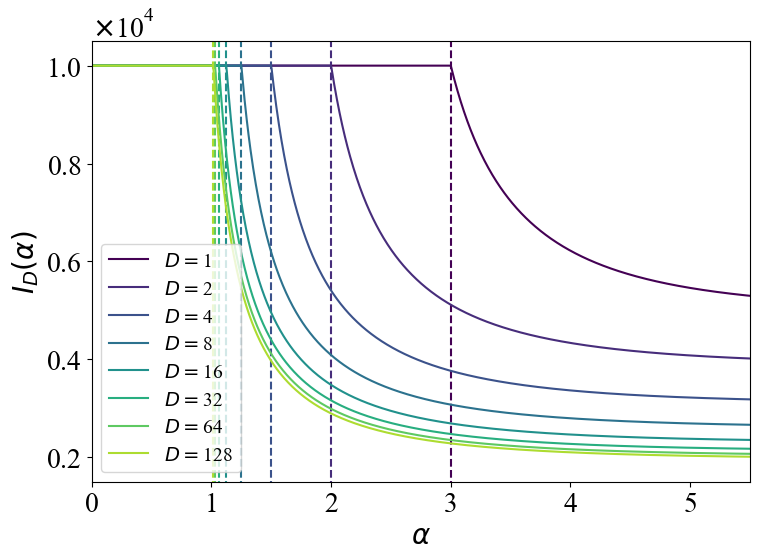

In [8]:
import os

import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import ScalarFormatter

from power_law_fisher_info.utils import calc_I_ii

plt.rcParams.update(
    {
        #    "text.usetex": True,
        "font.family": "Times New Roman",
        #    "font.family": "sans-serif",
        "font.sans-serif": "Helvetica",
        "font.size": 20,
    }
)

sgm0 = 0.01
sgmi = 0.01
d_list = [1, 2, 4, 8, 16, 32, 64, 128]
alpha_list = np.linspace(0, 5.5, 1000)

cmap = plt.get_cmap("viridis")
_ymax = 10500

fig, ax = plt.subplots(figsize=(8, 6), tight_layout=True)

for i, d in enumerate(d_list):
    I = calc_I_ii(alpha_list, d, sgm0, sgmi)
    color = cmap(i / len(d_list))
    ax.plot(alpha_list, I, label=f"$D=${d}", c=color)
    ax.vlines(x=(1 + 2 / d), ymin=0, ymax=_ymax, linestyle="--", color=color)

ax.set_xlim([0, 5.5])
ax.set_ylim([1500, _ymax])
ax.set_xlabel(r"$\alpha$")
ax.set_ylabel(r"$I_D(\alpha)$")
ax.yaxis.set_major_formatter(ScalarFormatter(useMathText=True))
ax.ticklabel_format(style="sci", axis="y", scilimits=(0, 0))
ax.legend(fontsize=14)

os.makedirs("output", exist_ok=True)
plt.savefig("output/fig3.eps", pad_inches=0.05, bbox_inches="tight")

## Figure 4

## Figure 5

/Users/tatsukawa/workspace/power-law-fisher-info/power_law_fisher_info/utils.py:16: RuntimeWarning: invalid value encountered in divide
  zeta(alpha-k) / ((sgm0**2 * d * Vd**(2.0/d) / 4) + (sgmi**2) * zeta(alpha-k)),
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


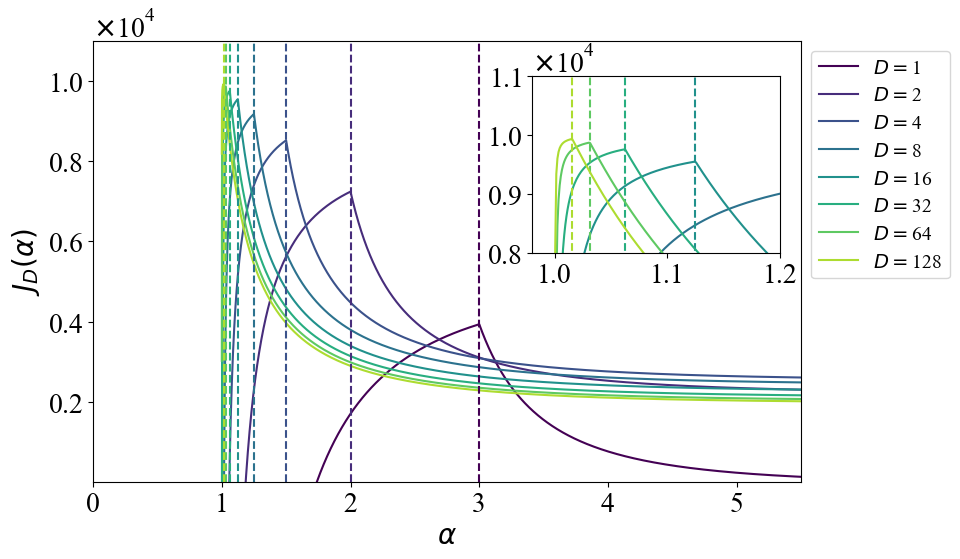

In [9]:
import os

import numpy as np
from scipy.special import zeta
import matplotlib.pyplot as plt
from matplotlib.ticker import ScalarFormatter

from power_law_fisher_info.utils import calc_I_ii, calc_theoretical_gamma

plt.rcParams.update(
    {
        #    "text.usetex": True,
        "font.family": "Times New Roman",
        #    "font.family": "sans-serif",
        "font.sans-serif": "Helvetica",
        "font.size": 20,
    }
)

fig, ax = plt.subplots(figsize=(10, 6), tight_layout=True)

sgm0 = 0.01
sgmi = 0.01
d_list = [1, 2, 4, 8, 16, 32, 64, 128]
cmap = plt.get_cmap("viridis")
alpha_list = np.linspace(0, 5.5, 10000)
gamma_coef = 0.1
ymax = 11000

for i, d in enumerate(d_list):
    gm = gamma_coef * calc_theoretical_gamma(d, sgm0, sgmi)
    energy = np.where(alpha_list > 1, zeta(alpha_list), np.inf)

    I = calc_I_ii(alpha_list, d, sgm0, sgmi)
    ax.plot(alpha_list, I - gm * energy, label=f"$D=${d}", c=cmap(i / len(d_list)))

# d in ds に対して 1 + 2/d の点線を引く
for i, d in enumerate(d_list):
    color = cmap(i / len(d_list))
    ax.vlines(x=(1 + 2 / d), ymin=0, ymax=ymax, linestyle="--", color=color)

ax.yaxis.set_major_formatter(ScalarFormatter(useMathText=True))
ax.ticklabel_format(style="sci", axis="y", scilimits=(0, 0))
ax.set_xlim([0, 5.5])
ax.set_ylim([1, ymax])
# 左下に legend を配置
ax.legend(fontsize=14, loc="upper left", bbox_to_anchor=(1, 1))

# inset plot
x = 0.62
y = 0.52
w = 0.35
h = 0.4
rect = [x, y, w, h]
ax1 = ax.inset_axes(rect)
ax1.set_position(rect)
ds1 = [8, 16, 32, 64, 128]
span = 3
alpha_list = np.linspace(0, 2, 2000)
energy = zeta(alpha_list)
for i, d in enumerate(ds1):
    gm = gamma_coef * calc_theoretical_gamma(d, sgm0, sgmi)
    energy = np.where(alpha_list > 1, zeta(alpha_list), np.inf)
    color = cmap((i + span) / len(d_list))
    I = calc_I_ii(alpha_list, d, sgm0, sgmi)
    ax1.plot(alpha_list, I - gm * energy, label=f"$D=${d}", c=color)
    ax1.vlines(x=(1 + 2 / d), ymin=0, ymax=ymax, linestyle="--", color=color)

ax1.set_xlim([0.98, 1.2])
ax1.set_ylim([8000, ymax])
ax1.yaxis.set_major_formatter(ScalarFormatter(useMathText=True))
ax1.ticklabel_format(style="sci", axis="y", scilimits=(0, 0))
plt.xlabel(r"$\alpha$")
plt.ylabel(r"$J_D(\alpha)$")

os.makedirs("outputs", exist_ok=True)
plt.savefig("output/fig5.eps", pad_inches=0.05, bbox_inches="tight")

# gamma plot
# fig, ax = plt.subplots(figsize=(8, 6), tight_layout=True)
# gamma_list = [gamma_coef * calc_theoretical_gamma(d, sgm0, sgmi) for d in d_list]
# ax.plot(d_list, gamma_list, marker='o')
# ax.set_xlabel(r'$D$')
# ax.set_ylabel(r'$\gamma$')
# ax.set_yscale('log')
# ax.set_xscale('log')